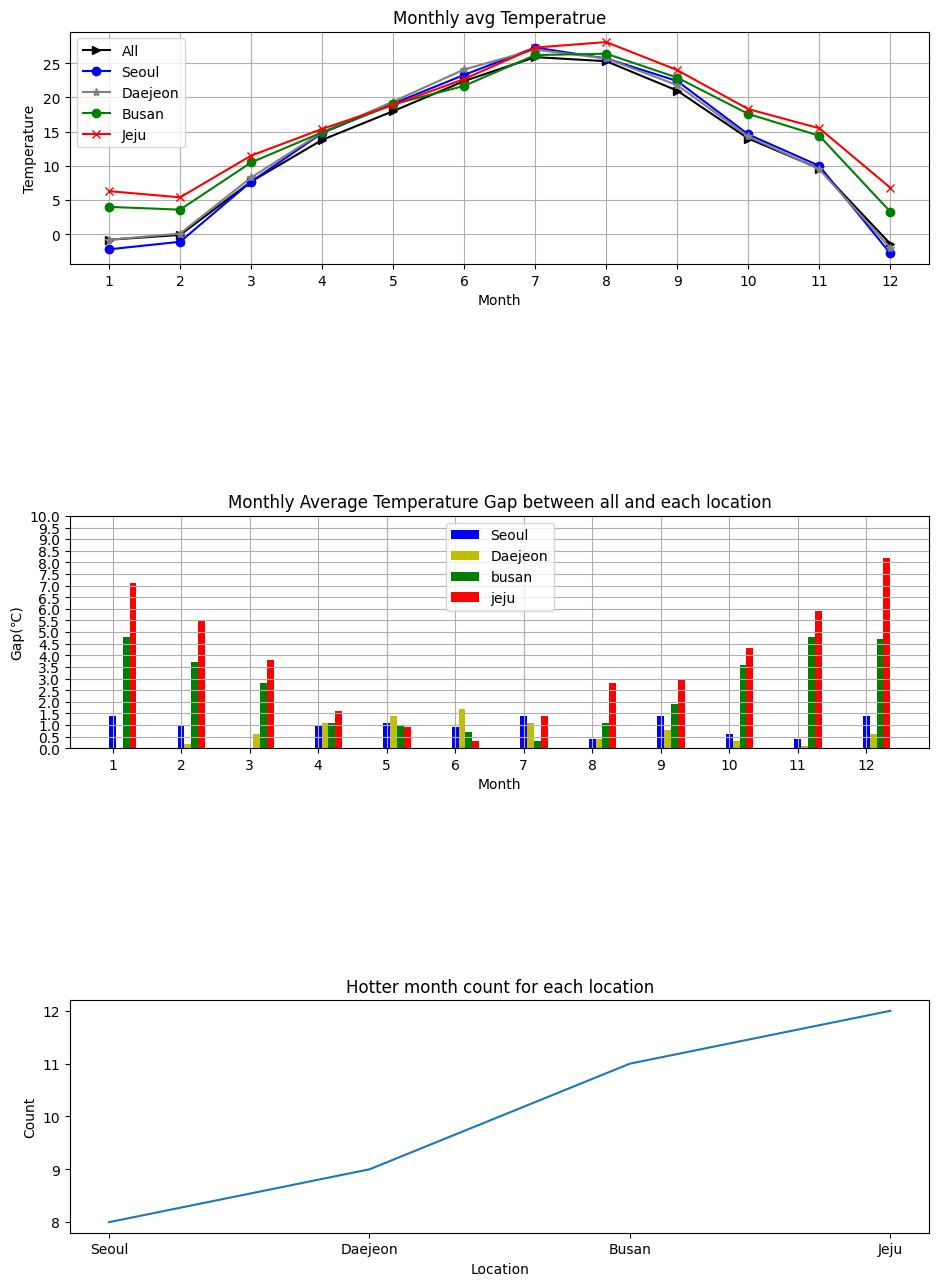

전국대비 더 더운지역은 총 12달중 12번 더 더웠던 제주, 다른 지역 대비 더 추운지역은 12달중 8번 더웠던 서울이다.


In [8]:
import csv
import matplotlib.pyplot as plt

def is_hotter(temp1,temp2):
    if temp1 < temp2: #전국 월평균보다 낮거나 같으면 추운지역, 높으면 더운지역
        return True
    else:
        return False
    
def main():
    f1=open('전국.csv', 'r', encoding='ANSI')
    f2=open('서울.csv', 'r', encoding='ANSI')
    f3=open('대전.csv', 'r', encoding='ANSI')
    f4=open('부산.csv', 'r', encoding='ANSI')
    f5=open('제주.csv', 'r', encoding='ANSI')

    data1=csv.reader(f1)
    next(data1)

    data2=csv.reader(f2)
    next(data2)

    data3=csv.reader(f3)
    next(data3)

    data4=csv.reader(f4)
    next(data4)

    data5=csv.reader(f5)
    next(data5)

    avg_temp1=[]
    for row in data1:
        avg_temp1.append(float(row[2]))
    avg_temp2=[]
    for row in data2:
        avg_temp2.append(float(row[2]))
    avg_temp3=[]
    for row in data3:
        avg_temp3.append(float(row[2]))
    avg_temp4=[]
    for row in data4:
        avg_temp4.append(float(row[2]))
    avg_temp5=[]
    for row in data5:
        avg_temp5.append(float(row[2]))
    
    month=range(1,13,1)
    plt.subplot(3,1,1)
    plt.plot(month,avg_temp1,color='black', marker='>',label='All')
    plt.plot(month,avg_temp2,color='blue',marker='o',label='Seoul')
    plt.plot(month,avg_temp3,color='gray',marker='*',label='Daejeon')
    plt.plot(month,avg_temp4,color='green',marker='o',label='Busan')
    plt.plot(month,avg_temp5,color='red',marker='x',label='Jeju')
    plt.title('Monthly avg Temperatrue')
    plt.xlabel('Month')
    plt.ylabel('Temperature')
    plt.legend()
    plt.grid(True)
    plt.xticks(range(1,13,1))
    
    diff_seoul=[]
    diff_daejeon=[]
    diff_busan=[]
    diff_jeju=[]
    for i in range(0,12,1):
        if avg_temp1[i] >= avg_temp2[i]:
            diff_seoul.append(avg_temp1[i]-avg_temp2[i])
        else:
            diff_seoul.append(avg_temp2[i]-avg_temp1[i])
            
        if avg_temp1[i] >= avg_temp3[i]:
            diff_daejeon.append(avg_temp1[i]-avg_temp3[i])
        else:
            diff_daejeon.append(avg_temp3[i]-avg_temp1[i])
            
        if avg_temp1[i] >= avg_temp4[i]:
            diff_busan.append(avg_temp1[i]-avg_temp4[i])
        else:
            diff_busan.append(avg_temp4[i]-avg_temp1[i])
            
        if avg_temp1[i] >= avg_temp5[i]:
            diff_jeju.append(avg_temp1[i]-avg_temp5[i])
        else:
            diff_jeju.append(avg_temp5[i]-avg_temp1[i])
        
    plt.subplot(3,1,2)
    plt.title('Monthly Average Temperature Gap between all and each location')
    plt.xticks(range(1,13,1))
    bar_width=0.1
    plt.bar(month,diff_seoul,color='b',width=bar_width,label='Seoul')
    plt.bar([x+bar_width for x in month],diff_daejeon,width=bar_width,color='y',label='Daejeon')
    plt.bar([x+bar_width*2 for x in month],diff_busan,width=bar_width,color='g',label='busan')
    plt.bar([x+bar_width*3 for x in month],diff_jeju,width=bar_width,color='r',label='jeju')
    plt.legend()
    plt.xlabel('Month')
    plt.ylabel('Gap(℃)')
    plt.yticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10])
    plt.grid(True)
    
    loc_cnt={'Seoul':0, 'Daejeon':0, 'Busan':0, 'Jeju':0}
    loc=list(loc_cnt.keys())
    for i in loc:
        for j in range(0,12,1):
            temp1=avg_temp1 #전국
            if i == 'Seoul':
                temp2=avg_temp2
            elif i== 'Daejeon':
                temp2=avg_temp3
            elif i== 'Busan':
                temp2=avg_temp4
            else:
                temp2=avg_temp5
            if is_hotter(temp1[j], temp2[j]):
                loc_cnt[i]=loc_cnt[i]+1 
    
    cnt=list(loc_cnt.values())
    
    plt.subplot(3,1,3)
    plt.title('Hotter month count for each location')
    plt.plot(loc,cnt)
    plt.xlabel('Location')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.gcf().set_size_inches(10, 15)
    plt.show()
    
    f1.close()
    f2.close()
    f3.close()
    f4.close()
    f5.close()
    print('전국대비 더 더운지역은 총 12달중 12번 더 더웠던 제주, 다른 지역 대비 더 추운지역은 12달중 8번 더웠던 서울이다.')

if __name__ =='__main__':
    main()